<a href="https://colab.research.google.com/github/subha8139/project/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Churn_Modelling.csv to Churn_Modelling.csv
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57   

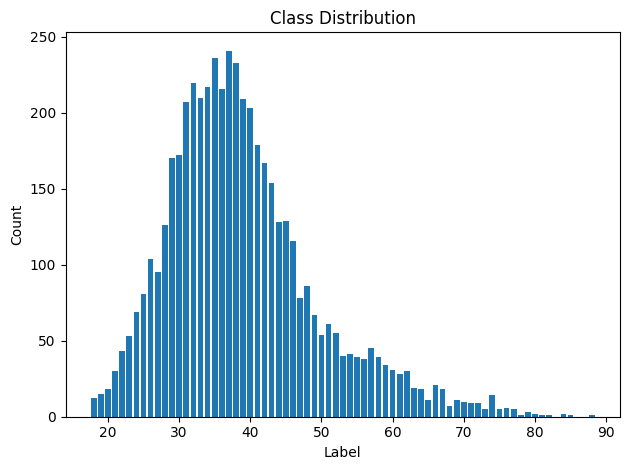

Accuracy: 0.052
Confusion Matrix:
 [[0 0 4 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


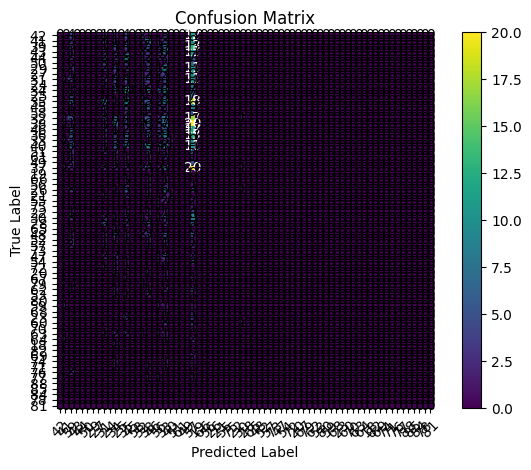

ROC curve skipped (more than 2 classes).


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(df.head())
print(df.columns)

label_counts = df['Age'].value_counts()
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

X = df.drop('Age', axis=1)
y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert each row of the DataFrame into a single string for TF-IDF vectorization
X_train_text = X_train.astype(str).agg(' '.join, axis=1)
X_test_text = X_test.astype(str).agg(' '.join, axis=1)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

def check_spam(msg):
    # The example function check_spam is not relevant for this dataset
    # and would require an actual text input similar to the original problem.
    # For this network traffic dataset, a direct string input is not suitable
    # unless a specific column or combination of columns is treated as text.
    # For demonstration, we'll keep it but acknowledge it's not directly applicable
    # to the current dataset's features unless a similar text transformation is applied.
    # For instance, if 'msg' was a concatenated string of features from a single new flow.
    return "Prediction not applicable to example due to data type mismatch"



cm = confusion_matrix(y_test, predictions, labels=y.unique())
print("Confusion Matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j],
                 ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

if len(y.unique()) == 2:
    y_test_binary = (y_test == y.unique()[1]).astype(int)
    y_prob = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve skipped (more than 2 classes).")

In [3]:
import pandas as pd

df_churn = pd.read_csv('/content/Churn_Modelling.csv')
print("DataFrame 'df_churn' loaded successfully. Displaying the first 5 rows:")
df_churn.head()

DataFrame 'df_churn' loaded successfully. Displaying the first 5 rows:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("\nDataFrame Info:")
df_churn.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        4999 non-null   int64  
 1   CustomerId       4999 non-null   int64  
 2   Surname          4999 non-null   object 
 3   CreditScore      4999 non-null   int64  
 4   Geography        4999 non-null   object 
 5   Gender           4999 non-null   object 
 6   Age              4999 non-null   int64  
 7   Tenure           4999 non-null   int64  
 8   Balance          4999 non-null   float64
 9   NumOfProducts    4999 non-null   int64  
 10  HasCrCard        4999 non-null   int64  
 11  IsActiveMember   4999 non-null   int64  
 12  EstimatedSalary  4999 non-null   float64
 13  Exited           4999 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 546.9+ KB
